# DAT200 CA3 2023

Kaggle username: andrinezimmermann

### Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Reading data

In [8]:
# Loading the train dataset
water_df = pd.read_csv('./assets/train.csv', sep=',', index_col=0)
water_df.shape

(2040, 10)

### Data exploration and visualisation

In [9]:
# Descriptive stats
describe_stats = water_df.describe()
describe_stats

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2040.000000  2040.000000   2040.000000  2040.000000  2040.000000   
mean      7.045930   195.998874  22005.555875     7.111529   333.349677   
std       1.597071    34.284142   8683.483885     1.616997    45.805572   
min       0.216124    69.817622    336.989742     1.321327   171.196409   
25%       6.033722   174.968973  15566.304215     6.111137   304.722266   
50%       6.958491   197.260049  20977.941519     7.098779   335.207355   
75%       7.998105   216.784623  26971.346790     8.078323   360.990547   
max      14.700000   301.471218  58101.437939    13.286030   483.112422   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity    Drinkable  
count   2040.000000     2040.000000      2040.000000  2040.000000  2040.000000  
mean     424.783924       14.240333        66.311518     3.964849     0.500000  
std       83.757539        3.455875        16.485962     0.792210     0.500123  
min      191.538750        2.090000         8.148162     1.417596     0.000000  
25%      361.944320       11.829769        55.539686     3.423092     0.000000  
50%      419.621502       14.224112        66.318316     3.957272     0.500000  
75%      481.204843       16.665868        77.048602     4.487263     1.000000  
max      791.009751       28.357042       126.031581     6.819486     1.000000

Compared to the mean, the maximum value of Solids is very high. Could be a possible outlier. The standard deviation of this feature is also quite high, which can indicate an outlier. The conductivity feature also has a high maximum value compared to the mean.

In [53]:
# Checking for any missing values
nan = water_df.isna().sum()
print(nan)

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Drinkable          0
dtype: int64


There are no missing values in the dataset. 

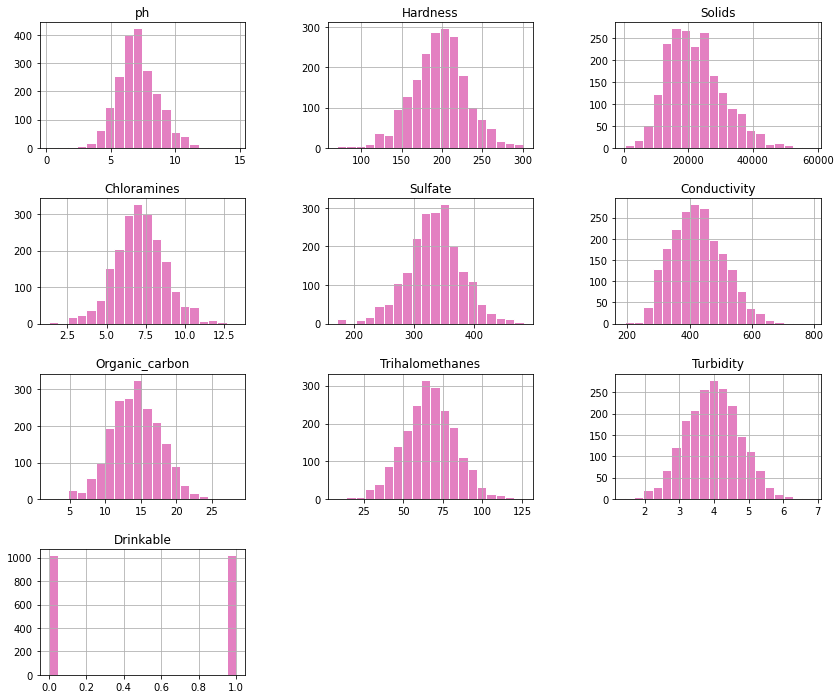

In [54]:
# Histogram for each feature
water_df.hist(bins=20, figsize=(14,12), color='#e380c1', edgecolor='white')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

All features seem to be normally distributed. 

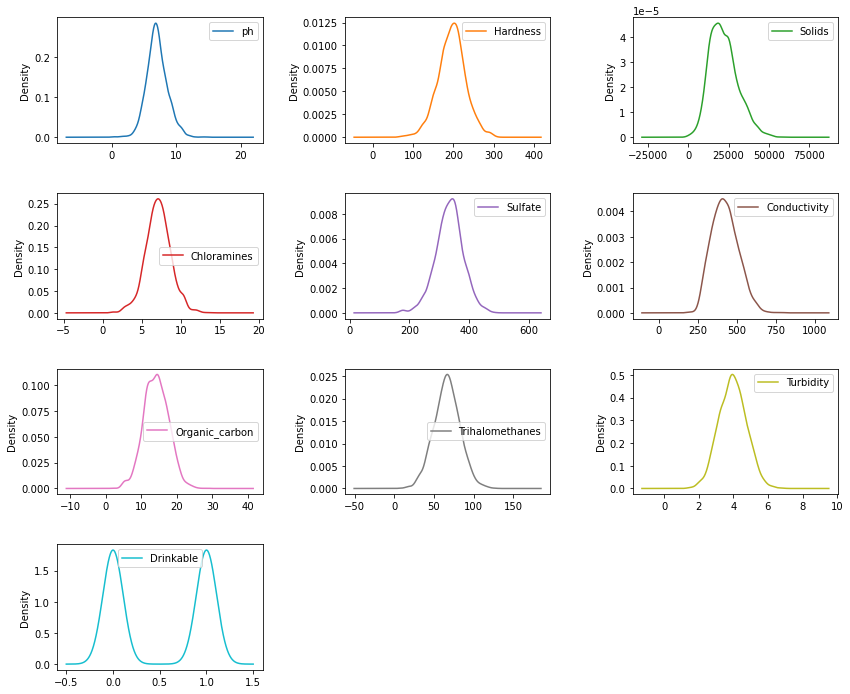

In [55]:
# Desity plot for each feature
water_df.plot.density(subplots=True, figsize=(14,12), layout=(4,3), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

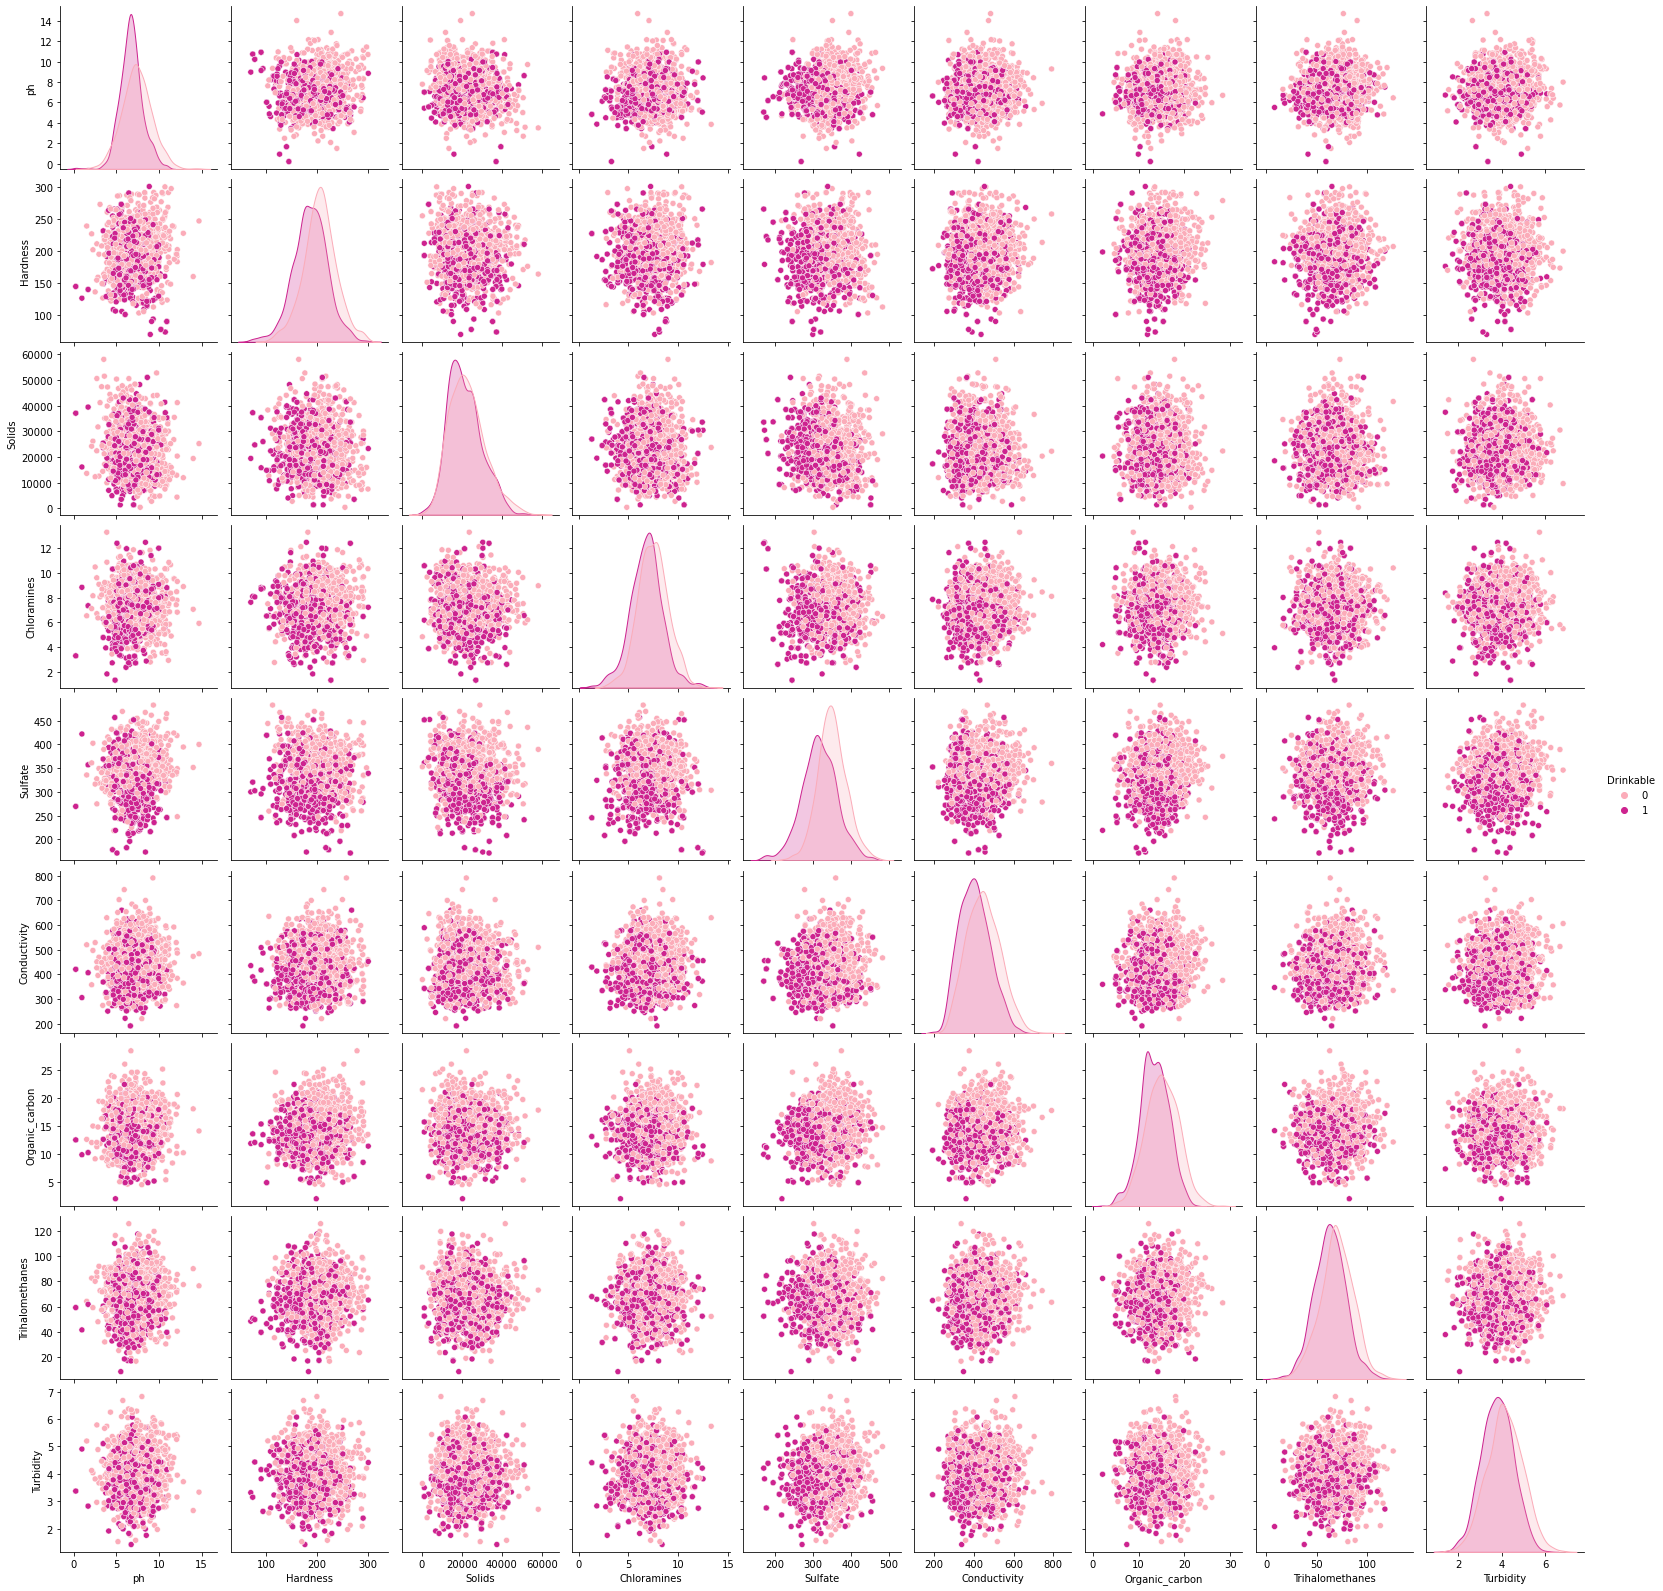

In [56]:
# Pairplot with seaborn
sns.pairplot(water_df, hue='Drinkable', palette="RdPu")
plt.show()

Based on these scatterplots, a linear classifier such as Perseptron or Adaline may not work the best for prediction in this case. 

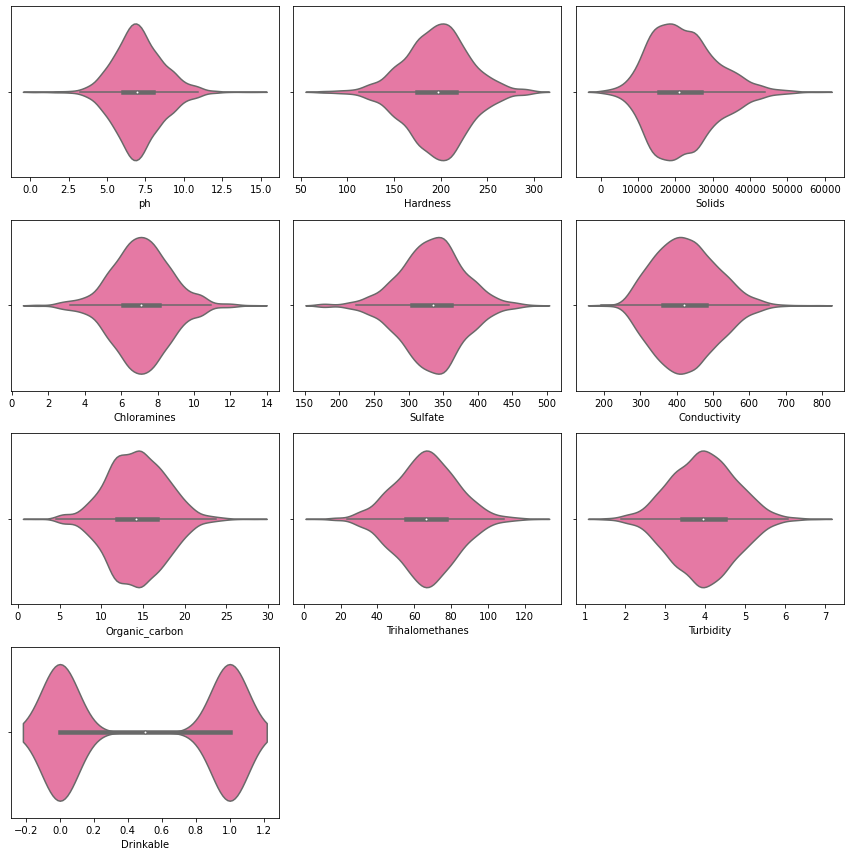

In [57]:
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))

# Flatten axes to iterate over them
axes = axes.flatten()

# Create a violin plot for each feature
for i, col in enumerate(water_df.columns):
    sns.violinplot(x=col, data=water_df, ax=axes[i], palette='RdPu')

# Remove any unused axes
for ax in axes[len(water_df.columns):]:
    ax.remove()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

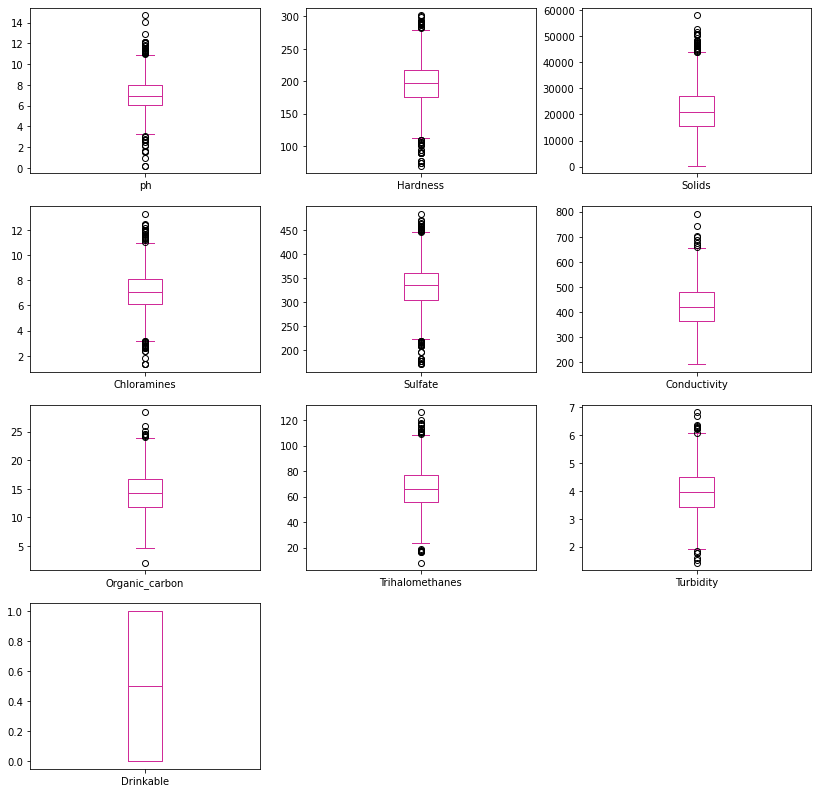

In [58]:
# Boxplots for all features
water_df.plot.box(subplots=True, figsize=(14,14), layout=(4, 3), sharex=False, sharey=False, color='#d02b98')
plt.show()

### Data cleaning

In [59]:
# Using the z-score to remove rows with outliers. 

df_clean = water_df[(np.abs(stats.zscore(water_df)) < 3).all(axis=1)]

print(f'The dataframe reduced from {water_df.shape[0]} to {df_clean.shape[0]} rows.')

The dataframe reduced from 2040 to 1955 rows.


### Data exploration after cleaning

In [60]:
# Descriptive stats
describe_stats = df_clean.describe()
describe_stats

ph     Hardness        Solids  Chloramines      Sulfate  \
count  1955.000000  1955.000000   1955.000000  1955.000000  1955.000000   
mean      7.043730   196.206868  21716.910554     7.082512   334.645224   
std       1.486325    33.233974   8381.176150     1.553625    43.793835   
min       2.495606    93.833061    336.989742     2.360161   208.191488   
25%       6.059456   175.048970  15519.674361     6.108543   305.470533   
50%       6.961493   196.993811  20827.779809     7.079624   335.469700   
75%       7.967632   216.122828  26719.646969     8.053060   361.286283   
max      11.797197   298.090657  47786.113535    11.864360   469.788860   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity    Drinkable  
count   1955.000000     1955.000000      1955.000000  1955.000000  1955.000000  
mean     424.337131       14.266866        66.153054     3.965433     0.499744  
std       83.108072        3.426037        16.178511     0.777842     0.500128  
min      191.538750        4.590494        17.114509     1.752153     0.000000  
25%      361.411368       11.864857        55.492787     3.435997     0.000000  
50%      419.586819       14.249784        66.284446     3.957161     0.000000  
75%      481.475434       16.675065        76.834220     4.488448     1.000000  
max      673.665391       24.569492       113.678488     6.334645     1.000000

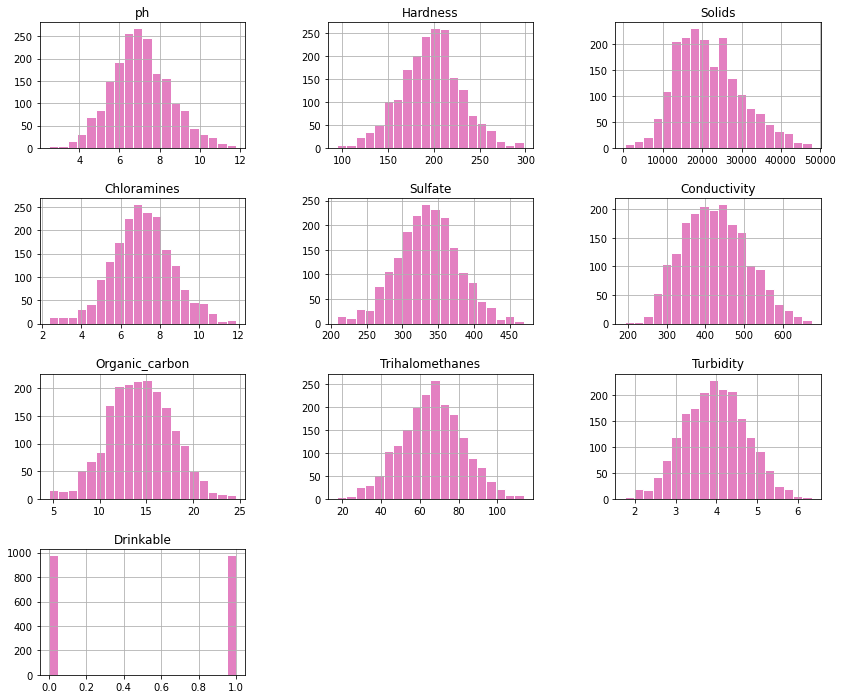

In [61]:
# Histogram for each feature
df_clean.hist(bins=20, figsize=(14,12), color='#e380c1', edgecolor='white')
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

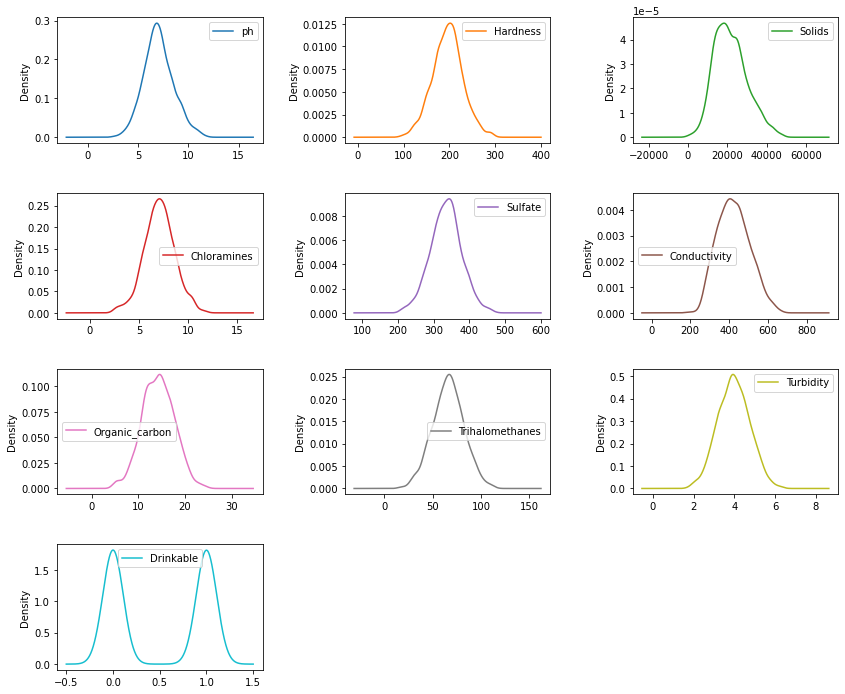

In [62]:
# Desity plot for each feature
df_clean.plot.density(subplots=True, figsize=(14,12), layout=(4,3), sharex=False, sharey=False)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

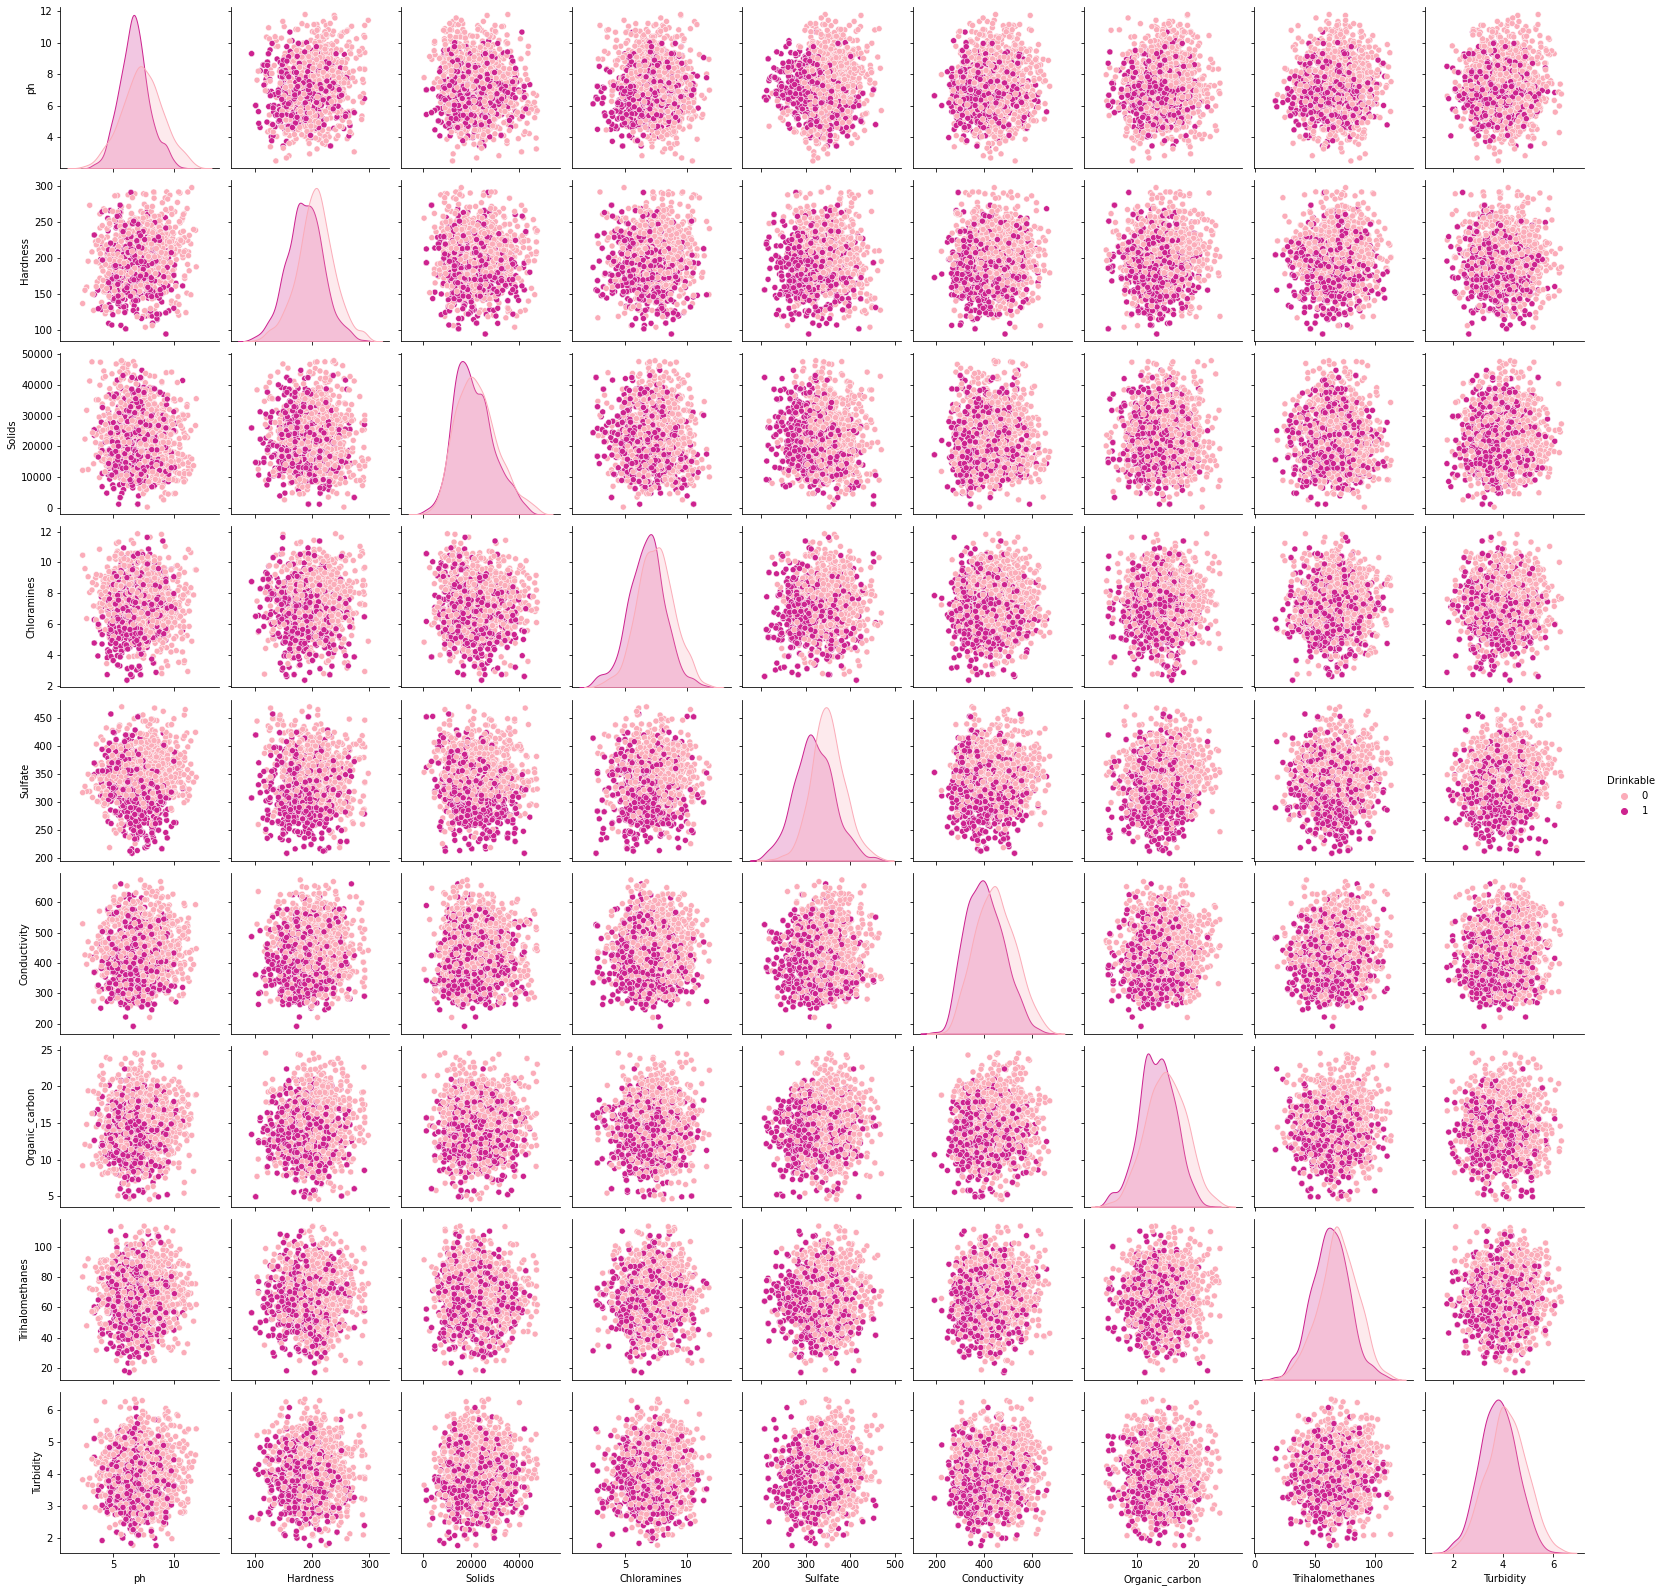

In [63]:
# Pairplot with seaborn
sns.pairplot(df_clean, hue='Drinkable', palette="RdPu")
plt.show()

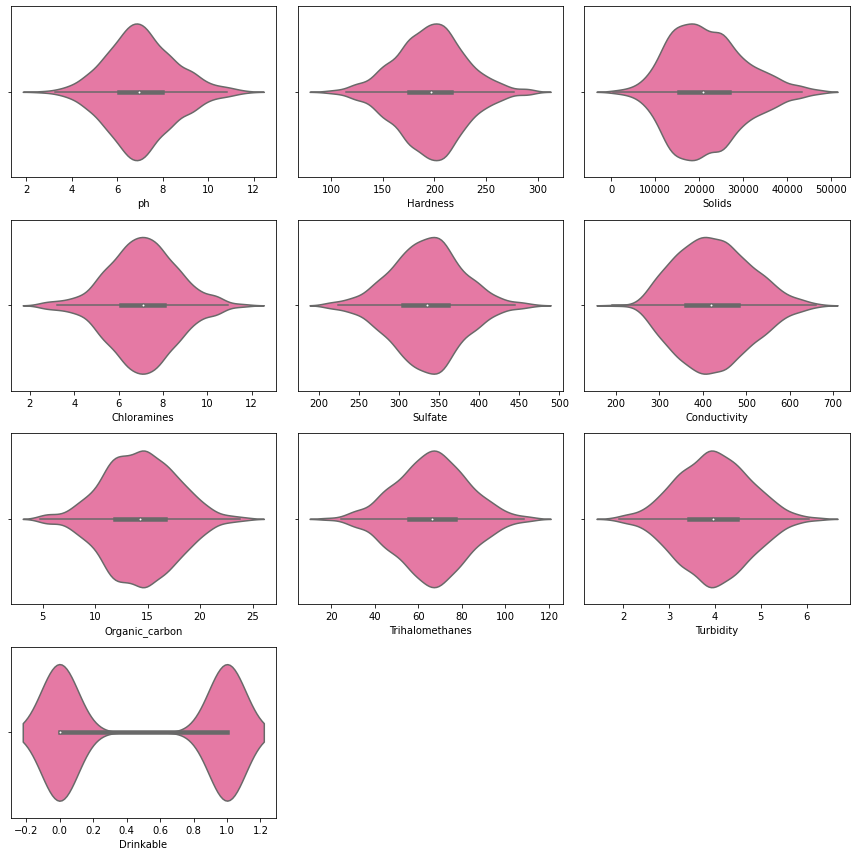

In [64]:
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12))

# Flatten axes to iterate over them
axes = axes.flatten()

# Create a violin plot for each feature
for i, col in enumerate(df_clean.columns):
    sns.violinplot(x=col, data=df_clean, ax=axes[i], palette='RdPu')

# Remove any unused axes
for ax in axes[len(df_clean.columns):]:
    ax.remove()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

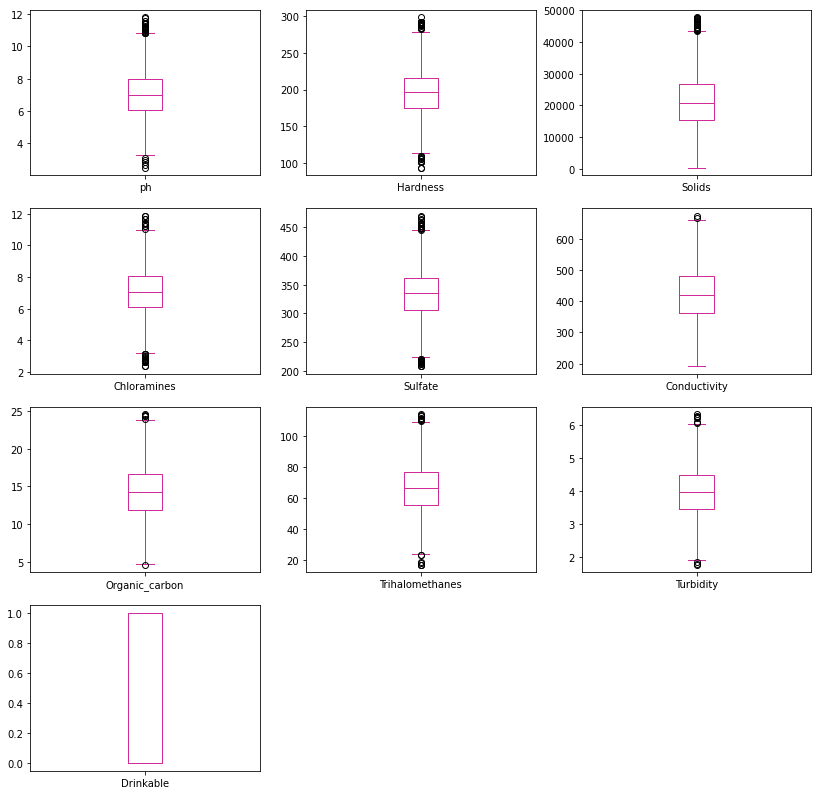

In [65]:
# Boxplots for all features
df_clean.plot.box(subplots=True, figsize=(14,14), layout=(4, 3), sharex=False, sharey=False, color='#d02b98')
plt.show()

### Data preprocessing

In [7]:
# Selecting features
X = df_clean.iloc[:, :-1].to_numpy()     # data
y = df_clean['Drinkable'].to_numpy()     # target

NameError: name 'df_clean' is not defined

#### Train test split

In [6]:
# Splitting the data into train and test sets. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

NameError: name 'X' is not defined

#### Scaling

In [5]:
sc = StandardScaler()
sc.fit(X_train)

# Scale X_train and then scale X_test with parameters (mean & std) of X_train
X_train_sc = sc.transform(X_train)
y_train_sc = sc.transform(X_test)

NameError: name 'X_train' is not defined

### Modelling

In [116]:
# Implementing random forest classifier.
forest = RandomForestClassifier(criterion='gini',
                                n_estimators=250, 
                                random_state=2,
                                n_jobs=-1)
forest.fit(X_train_sc, y_train)

# Print accuracy computed from predictions on the test set
print('Training data accuracy: {0:.2f}'.format(forest.score(X_train_sc, y_train)))

# Print accuracy computed from predictions on the test set
print('Test data accuracy: {0:.2f}'.format(forest.score(X_test_sc, y_test)))

Training data accuracy: 1.00
Test data accuracy: 0.87


### Final Evaluation

In [11]:
# Loading the test dataset
test_df = pd.read_csv('./assets/test.csv', index_col=0)

# Transform the test data using the scaler object that was fitted on the training data
test_df_sc = sc.transform(test_df)

# Make predictions using the fitted model
y_predict = forest.predict(test_df_sc)
y_predict

NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

### Kaggle submission

In [10]:
import pandas as pd

# Create a dataframe from the predicted target values
pred_df = pd.DataFrame(y_predict)

# Rename the columns of pred_df
pred_df.columns = ['Drinkable']

# Add the index column to the beginning of pred_df
pred_df.insert(loc=0, column='index', value=test_df.index)

# Save pred_df to a csv-file
pred_df.to_csv('prediction.csv', index=False)

NameError: name 'y_predict' is not defined